<h1> Task One </h1>

In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.api import VAR
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import warnings

In [5]:
# Load data
try:
    data = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)
    data.set_index('Date', inplace=True)
    print("Data loaded successfully")
except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Display the first few rows of the dataset
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_46616\3911890071.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


Data loaded successfully


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [7]:
# Data preprocessing
try:
    data = data.asfreq('D').ffill()
    print("Data preprocessing completed")
except Exception as e:
    print(f"An error occurred during preprocessing: {e}")

# Check for any remaining missing values
data.isnull().sum()

Data preprocessing completed


Price    0
dtype: int64

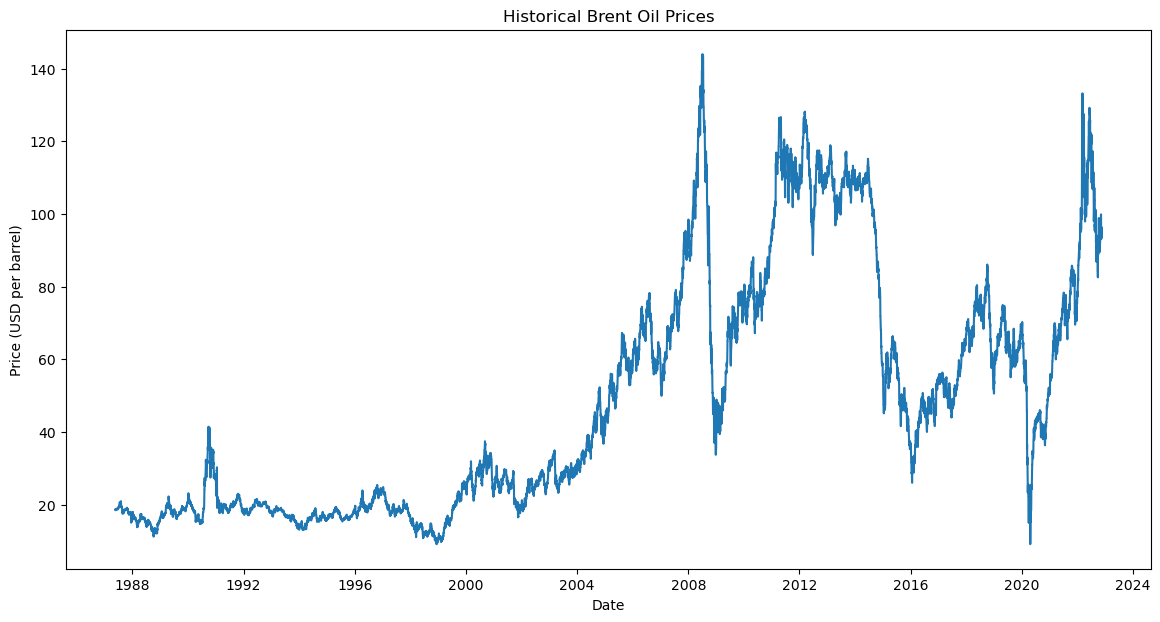

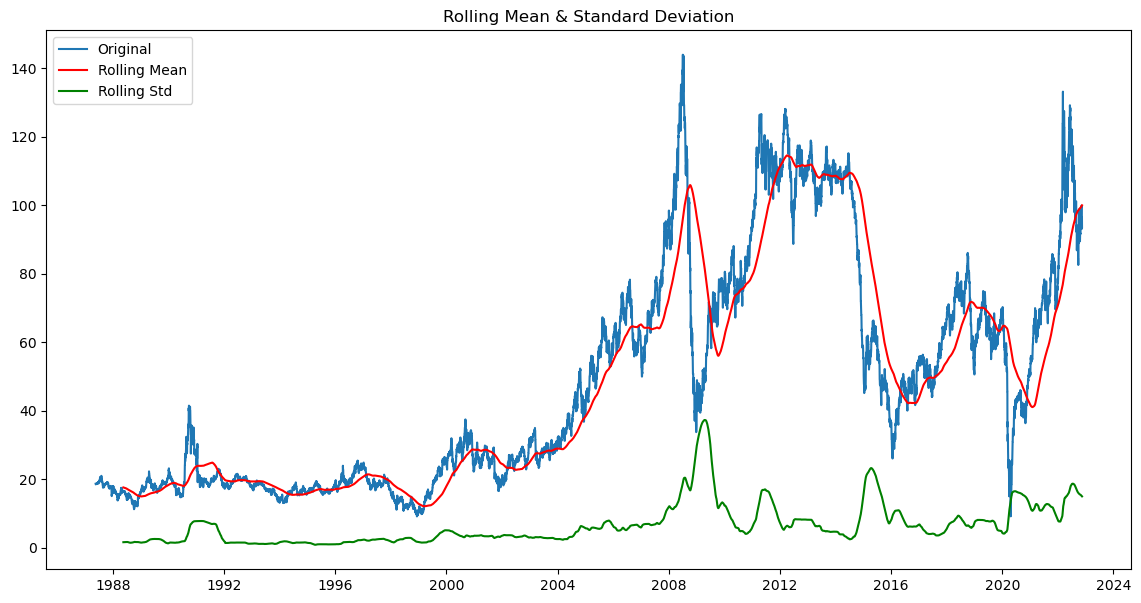

In [8]:
# Exploratory Data Analysis (EDA)
try:
    plt.figure(figsize=(14, 7))
    plt.plot(data['Price'])
    plt.title('Historical Brent Oil Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD per barrel)')
    plt.show()

    # Plot the rolling mean and standard deviation
    rolling_mean = data['Price'].rolling(window=365).mean()
    rolling_std = data['Price'].rolling(window=365).std()

    plt.figure(figsize=(14, 7))
    plt.plot(data['Price'], label='Original')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"An error occurred during EDA: {e}")

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                12963
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -18566.006
Date:                Wed, 03 Jul 2024   AIC                          37144.013
Time:                        21:16:13   BIC                          37188.831
Sample:                    05-20-1987   HQIC                         37158.990
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0067      0.005      1.420      0.156      -0.003       0.016
ar.L2         -0.0249      0.005     -5.025      0.000      -0.035      -0.015
ar.L3          0.0154      0.005      3.243      0.0

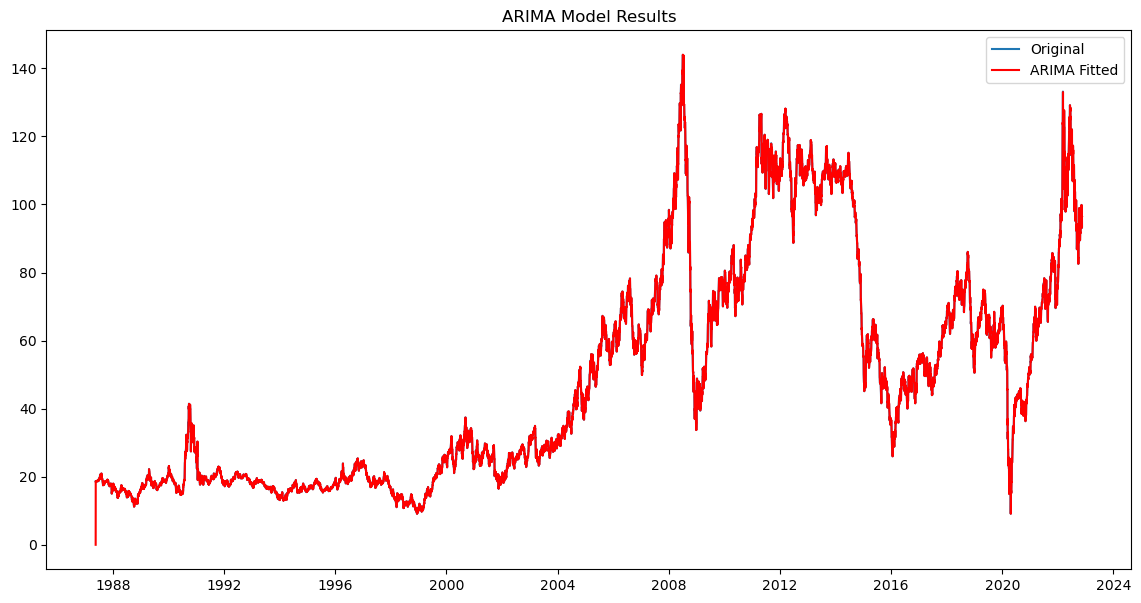

In [9]:
# ARIMA model implementation
try:
    arima_model = ARIMA(data['Price'], order=(5, 1, 0))
    arima_result = arima_model.fit()
    print(arima_result.summary())

    # Plot ARIMA model results
    plt.figure(figsize=(14, 7))
    plt.plot(data['Price'], label='Original')
    plt.plot(arima_result.fittedvalues, label='ARIMA Fitted', color='red')
    plt.title('ARIMA Model Results')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"An error occurred during ARIMA modeling: {e}")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 291555689319.51355
Iteration:      2,   Func. Count:     12,   Neg. LLF: 96849081.74802314
Iteration:      3,   Func. Count:     19,   Neg. LLF: 42230721.069492124
Iteration:      4,   Func. Count:     26,   Neg. LLF: 87763.20347559269
Iteration:      5,   Func. Count:     34,   Neg. LLF: 74334.27552343726
Iteration:      6,   Func. Count:     40,   Neg. LLF: 63232.76044444839
Iteration:      7,   Func. Count:     46,   Neg. LLF: 61482.91073575502
Iteration:      8,   Func. Count:     52,   Neg. LLF: 67945.90343295838
Iteration:      9,   Func. Count:     58,   Neg. LLF: 56863.189037676
Iteration:     10,   Func. Count:     64,   Neg. LLF: 51583.66752179062
Iteration:     11,   Func. Count:     69,   Neg. LLF: 93526.35355609933
Iteration:     12,   Func. Count:     79,   Neg. LLF: 54875.43367624635
Iteration:     13,   Func. Count:     85,   Neg. LLF: 55868.43459074573
Iteration:     14,   Func. Count:     91,   Neg. LLF: 54677.3579

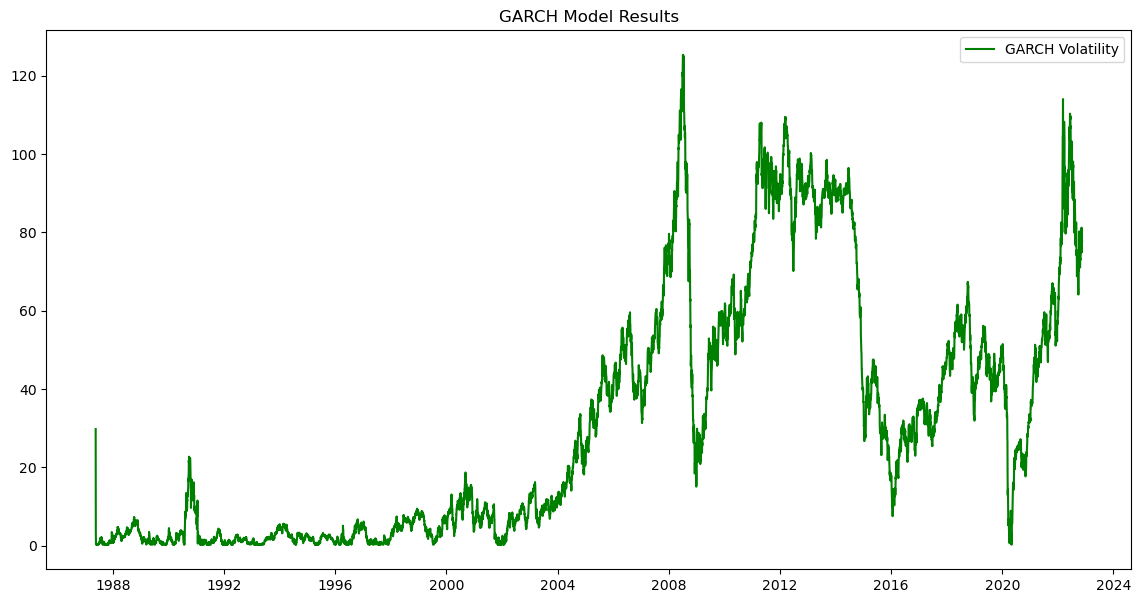

In [10]:
# GARCH model implementation
try:
    garch_model = arch_model(data['Price'], vol='Garch', p=1, q=1)
    garch_result = garch_model.fit()
    print(garch_result.summary())

    # Plot GARCH model results
    plt.figure(figsize=(14, 7))
    plt.plot(garch_result.conditional_volatility, label='GARCH Volatility', color='green')
    plt.title('GARCH Model Results')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"An error occurred during GARCH modeling: {e}")


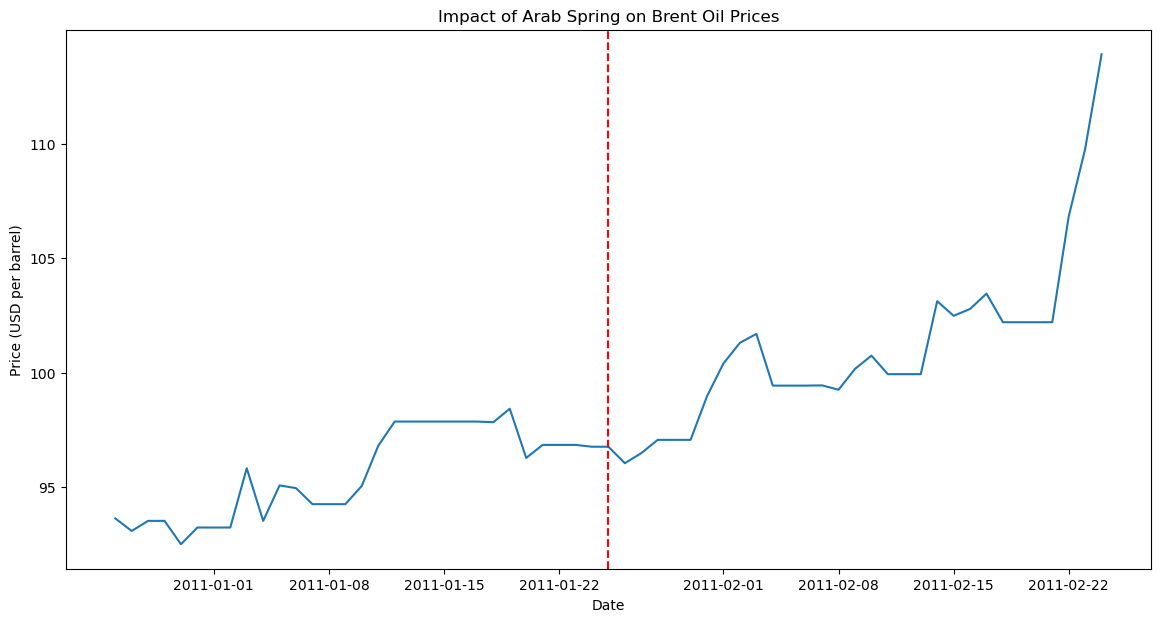

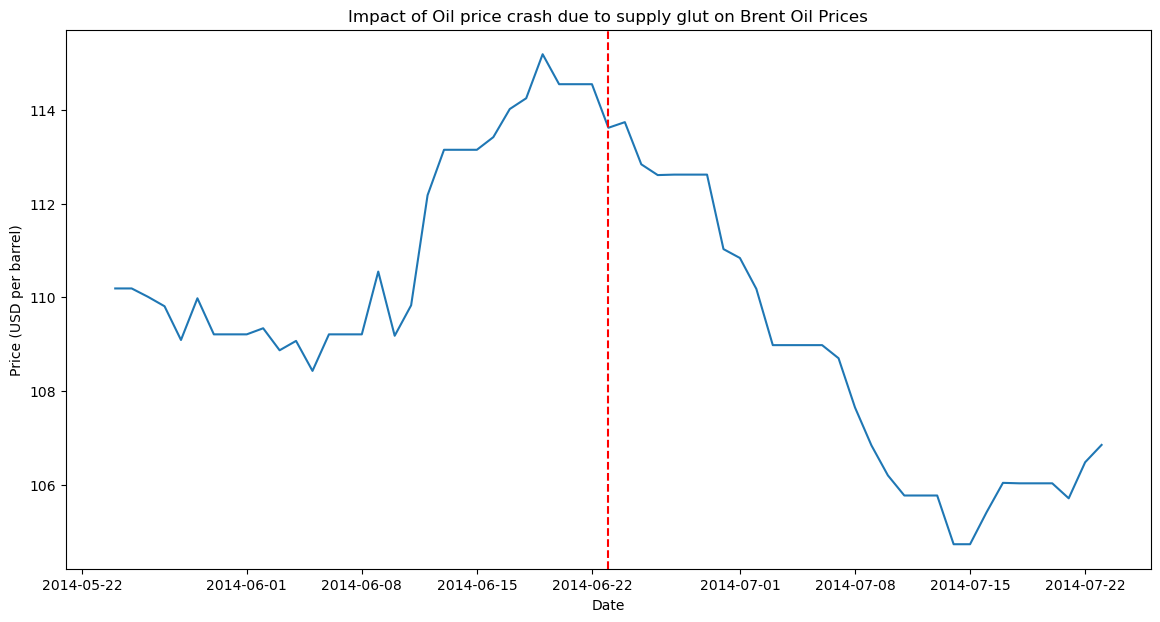

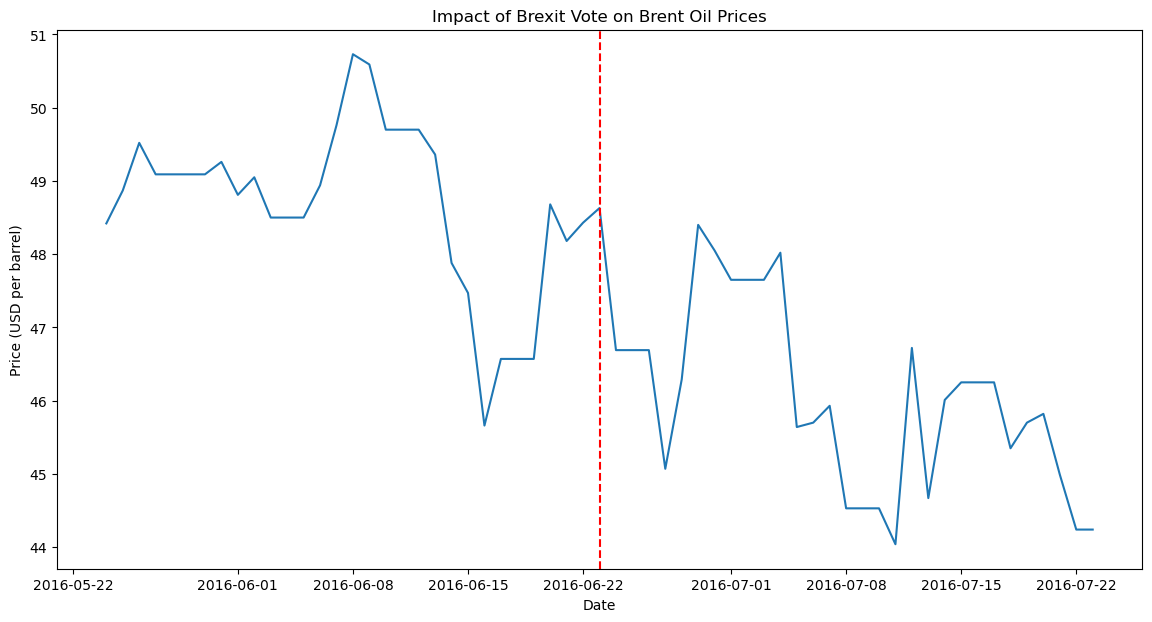

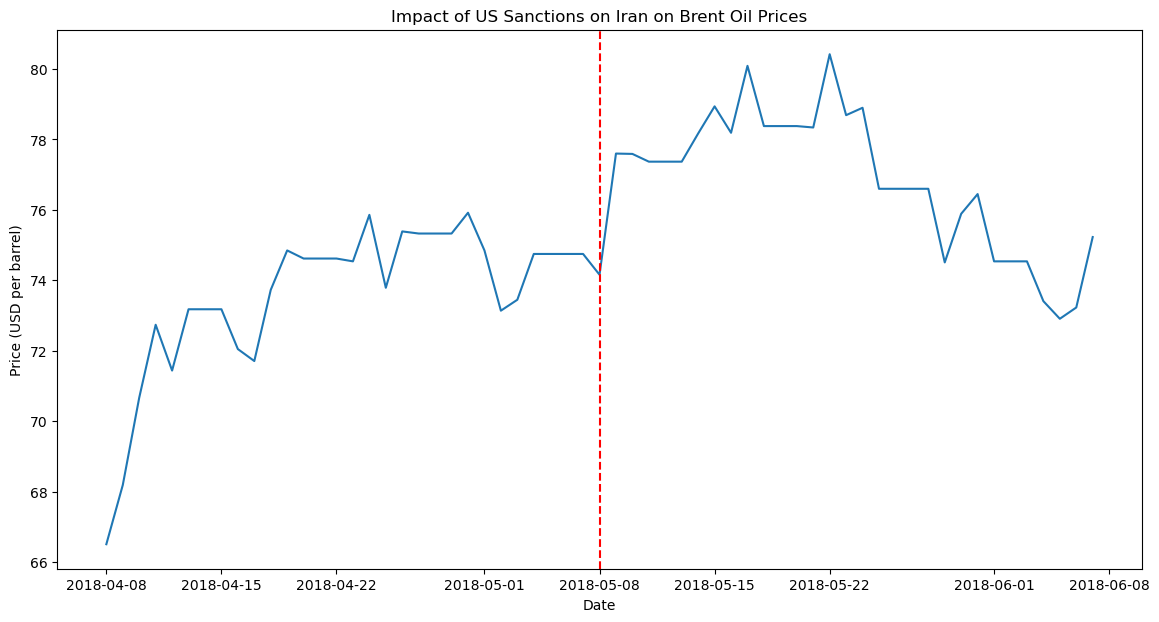

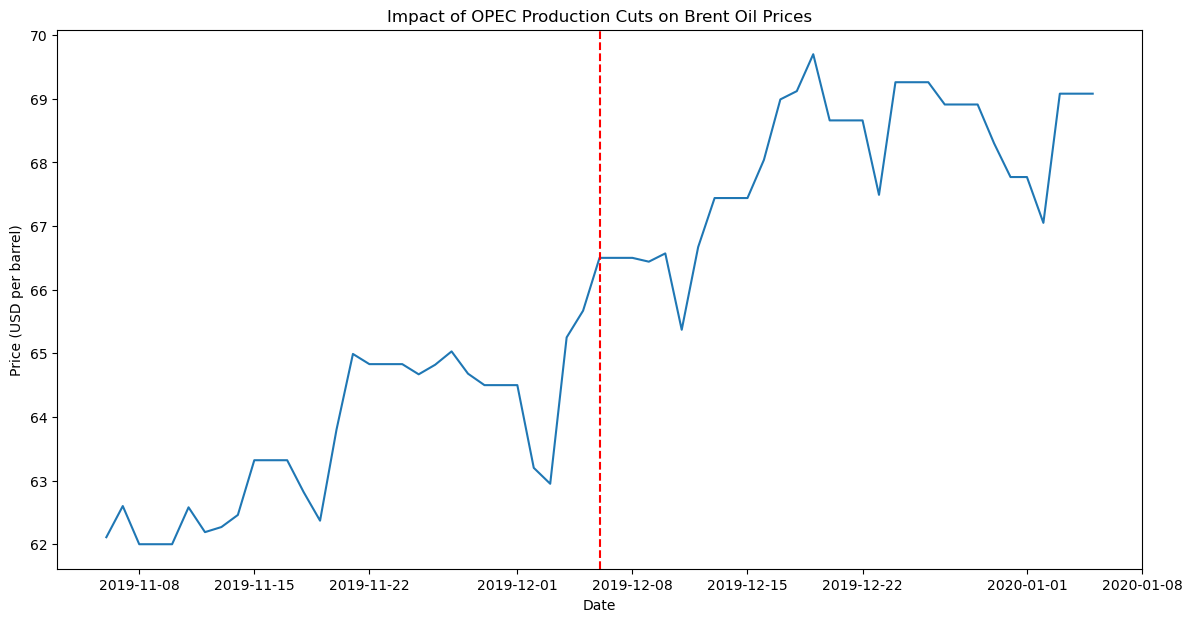

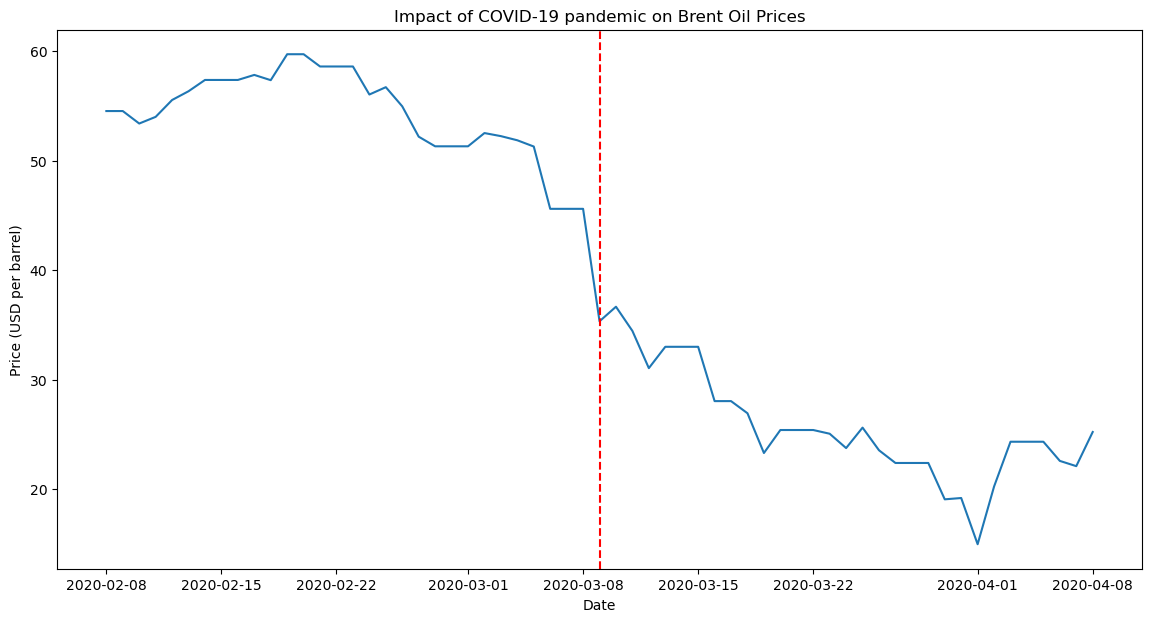

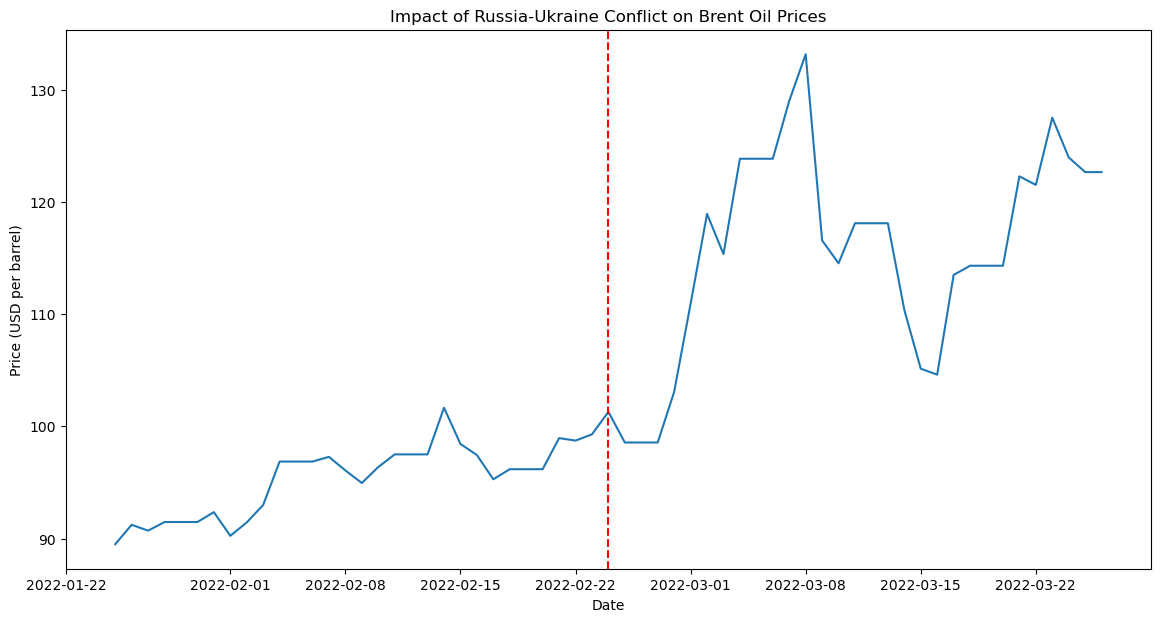

In [11]:
# Assume we have a list of key events and their dates
events = [
    {'date': '2011-01-25', 'event': 'Arab Spring'},
    {'date': '2014-06-23', 'event': 'Oil price crash due to supply glut'},
    {'date': '2016-06-23', 'event': 'Brexit Vote'},
    {'date': '2018-05-08', 'event': 'US Sanctions on Iran'},
    {'date': '2019-12-06', 'event': 'OPEC Production Cuts'},
    {'date': '2020-03-09', 'event': 'COVID-19 pandemic'},
    {'date': '2022-02-24', 'event': 'Russia-Ukraine Conflict'},
]

# Convert event dates to datetime
for event in events:
    event['date'] = pd.to_datetime(event['date'])

# Analyze the impact of events
try:
    for event in events:
        event_date = event['date']
        event_name = event['event']
        
        # Plot the price around the event date
        plt.figure(figsize=(14, 7))
        plt.plot(data['Price'][event_date - pd.Timedelta(days=30):event_date + pd.Timedelta(days=30)])
        plt.axvline(event_date, color='red', linestyle='--')
        plt.title(f'Impact of {event_name} on Brent Oil Prices')
        plt.xlabel('Date')
        plt.ylabel('Price (USD per barrel)')
        plt.show()
except Exception as e:
    print(f"An error occurred during event impact analysis: {e}")

<h1> Task Two</h1>

In [52]:
warnings.filterwarnings("ignore")

# Load economic data
economic_data = pd.read_csv('../data/world_economic_data.csv')
economic_data['date'] = pd.to_datetime(economic_data['date'])

# Load Brent oil prices data
brent_oil_data = pd.read_csv('../data/BrentOilPrices.csv')
brent_oil_data['date'] = pd.to_datetime(brent_oil_data['Date'])

In [53]:
# Merge datasets on date
data = pd.merge(economic_data, brent_oil_data, on='date')

data = data.apply(pd.to_numeric, errors='coerce')
data.drop(columns=['Date'], inplace=True)

In [54]:
data.head()

,date,GDP,Inflation,Unemployment,Price
0,694137600000000000,2.382355e+13,8.996939,4.996340,17.75
1,696816000000000000,2.396059e+13,8.883536,5.009140,18.15
2,702000000000000000,2.423467e+13,8.656731,5.034740,19.09
3,704592000000000000,2.437171e+13,8.543329,5.047540,19.65
4,709862400000000000,2.464578e+13,8.316524,5.073139,20.60


In [55]:
# Data Preprocessing
data.set_index('date', inplace=True)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

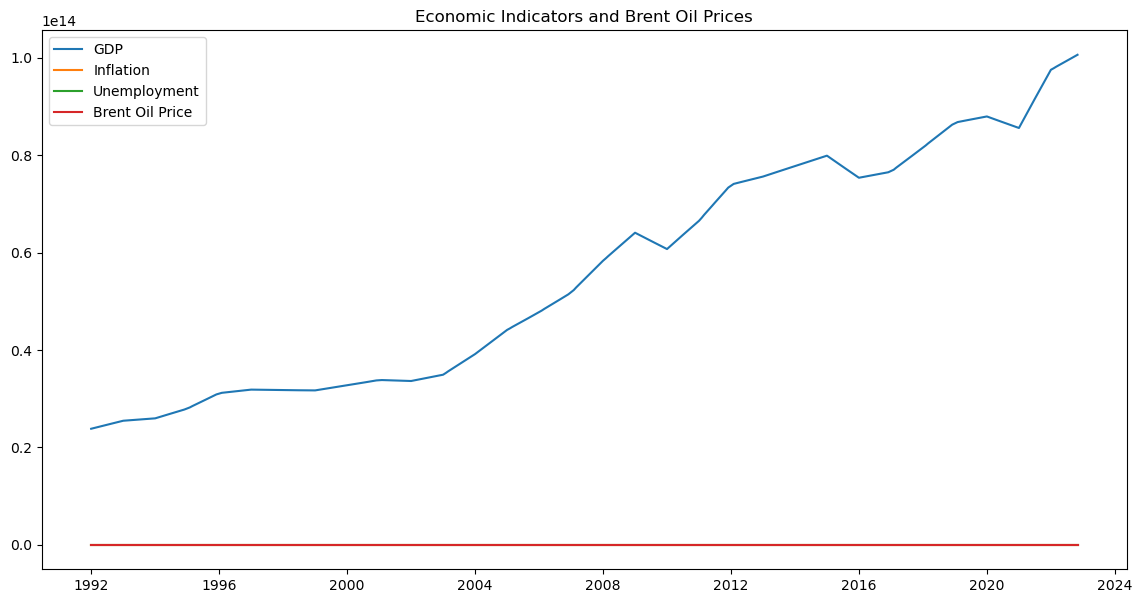

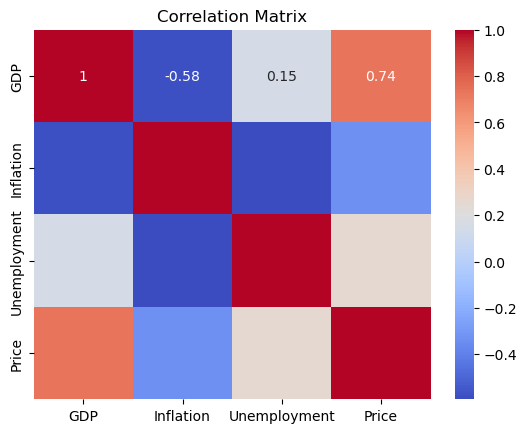

In [39]:
# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(14, 7))
plt.plot(data['GDP'], label='GDP')
plt.plot(data['Inflation'], label='Inflation')
plt.plot(data['Unemployment'], label='Unemployment')
plt.plot(data['Price'], label='Brent Oil Price')
plt.title('Economic Indicators and Brent Oil Prices')
plt.legend()
plt.show()

# Correlation matrix
numeric_data = data.drop(columns=['Date'])  # Drop the date column
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [60]:
# Step 4: Model Building
# VAR Model
model_var = VAR(data)
results_var = model_var.fit(maxlags=15, ic='aic')
print(results_var.summary())

# SARIMAX Model for Brent Oil Prices
model_sarimax = SARIMAX(data['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=data[['GDP', 'Inflation', 'Unemployment']])
results_sarimax = model_sarimax.fit()
print(results_sarimax.summary())

# LSTM Model (example continuation, assuming data is appropriately numeric)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 06, Jul, 2024
Time:                     19:11:06
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    47.7034
Nobs:                     255.000    HQIC:                   47.4046
Log likelihood:          -7429.76    FPE:                3.16414e+20
AIC:                      47.2035    Det(Omega_mle):     2.75424e+20
--------------------------------------------------------------------
Results for equation GDP
                          coefficient           std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const              10173957708.337923  698410491610.896729            0.015           0.988
L1.GDP                       1.474023             0.074199           19.866           0.000
L1.Inflation      

In [61]:
# LSTM Model
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i, 3])  # Brent Oil Price index

X, y = np.array(X), np.array(y)

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1965
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0413
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0235
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0313
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0199
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0201
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0210
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0166
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0166
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0180
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0176
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0136
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0123
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0125
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0145
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━

In [63]:
# Step 5: Model Evaluation
# Predictions with VAR model
var_forecast = results_var.forecast(data.values[-results_var.k_ar:], steps=10)
var_forecast_df = pd.DataFrame(var_forecast, index=pd.date_range(start=data.index[-1], periods=10, freq='M'), columns=data.columns)
print(var_forecast_df)

# Predictions with SARIMAX model
sarimax_forecast = results_sarimax.get_forecast(steps=10, exog=data[['GDP', 'Inflation', 'Unemployment']].iloc[-10:])
print(sarimax_forecast.summary_frame())

# Predictions with LSTM model
X_test = []
y_test = data['Price'][-60:]

for i in range(60, 70):
    X_test.append(scaled_data[i-60:i])

X_test = np.array(X_test)
predicted_prices = model_lstm.predict(X_test)
predicted_prices = np.concatenate([np.zeros((predicted_prices.shape[0], scaled_data.shape[1]-1)), predicted_prices], axis=1)
predicted_prices = scaler.inverse_transform(predicted_prices)[:, -1]

                     GDP  Inflation  Unemployment      Price
2022-10-31  1.009241e+14   7.480540      5.407949  92.887107
2022-11-30  1.011999e+14   7.628644      5.390582  91.739696
2022-12-31  1.014357e+14   7.707190      5.396129  90.695573
2023-01-31  1.016402e+14   7.739746      5.395259  89.859435
2023-02-28  1.018225e+14   7.743319      5.401032  89.198048
2023-03-31  1.019895e+14   7.728379      5.405781  88.667503
2023-04-30  1.021465e+14   7.701879      5.412525  88.235378
2023-05-31  1.022970e+14   7.668104      5.419215  87.879847
2023-06-30  1.024434e+14   7.629842      5.426510  87.586413
2023-07-31  1.025874e+14   7.588838      5.433836  87.345097
Price       mean    mean_se  mean_ci_lower  mean_ci_upper
257    91.114158   9.901304      71.707958     110.520358
258    92.009961  15.168361      62.280519     121.739402
259    78.140382  18.709047      41.471324     114.809440
260    75.400487  21.771823      32.728498     118.072475
261    80.890374  24.425826      33.016

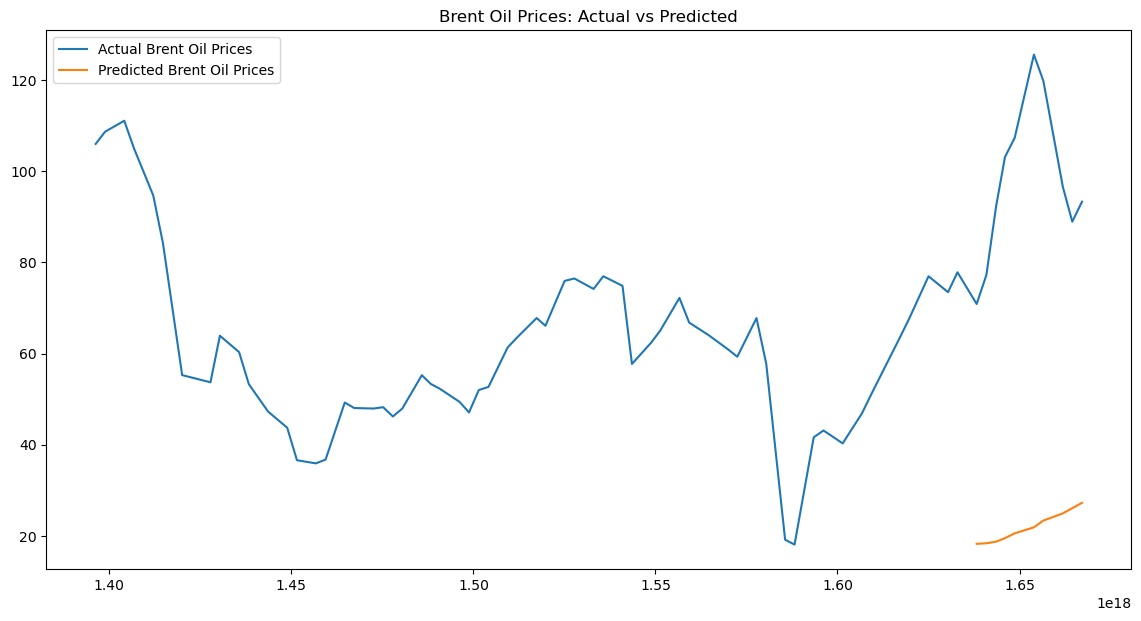

In [64]:
# Step 6: Insight Generation
# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data['Price'][-70:], label='Actual Brent Oil Prices')
plt.plot(pd.DataFrame(predicted_prices, index=data.index[-10:]), label='Predicted Brent Oil Prices')
plt.title('Brent Oil Prices: Actual vs Predicted')
plt.legend()
plt.show()